 Ön İşlemler: Problemler ve Çözümler
 
 Metnin alt birimlere dönüştürülmesi (Tokenization)
 Büyük küçük harf dönüşümü (Lowercase Conversion)
 Olumsuzlama işleme (Negation Handling)
 Alfabetik olmayan karakterlerin çıkarılması
 Etkisiz kelimelerin çıkarılması (Stopwords Removal)
 Kelime köklerinin bulunması (Stemming/Lemmatization)
 Kısaltmaların genişletilmesi (Expansion of Abbreviations)
 Yazım hatalarının düzeltilmesi (Spell Correction)
 Problemin niteliğine göre diğer işlemler yapılabilir...

Ön İşlemler: Gürültü Azaltma


Problem: Özel karakterler, yazım hataları, emoji ve alakasız semboller
metnin anlamını bozabilir.
 
Çözüm: Bu tür gürültü unsurlarını temizleyerek metni daha okunabilir
ve analiz edilebilir hale getirmek.
Gürültü azaltma, metin madenciliği ve doğal dil işleme süreçlerinde
önemli bir adımdır.

 Gürültülü Metin
 Harikaydık, futbol budur!!! #futbolgecesi
 Hey, What’s up!!!??? Nice 2 meet u :)
 Gürültü Azaltılmış Metin
 Harikaydık, futbol budur!
 Hey, What’s up? Nice to meet you.
 Yapılan İşlemler: Noktalama işaretleri düzenlemesi, emoji ve numara
 temizleme, alakasız sembollerin çıkarılması

Ön İşlemler: Standartlaştırma

Problem: Tarih biçimleri, sayısal gösterimler, mesafeler ve birimlerde
farklılıklar olabilir.
Çözüm: Farklı biçimleri tutarlı ve standart bir forma dönüştürmek.
Bu işlem, verinin analiz edilebilir ve tutarlı olmasını sağlar.


Tarih Biçimleri
Ekim 16, 2023
16-10-2023
10/16/23
16.10.2023

Mesafe Birimleri
10 mil ?
16 km  ?

Sayısal Değerler
3,14 
3.14 (Virgül ve nokta kullanımındaki farklılıklar)


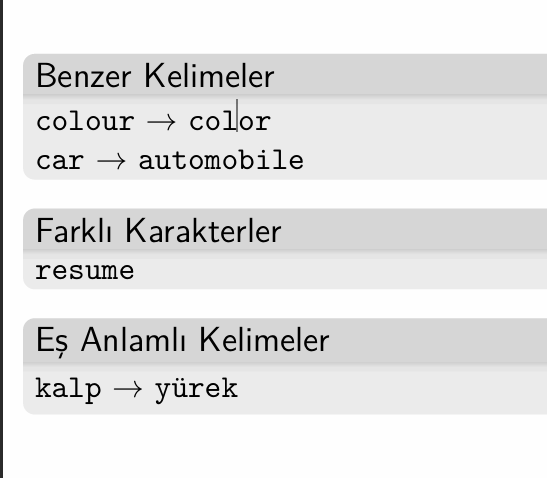

Metin Normalizasyonu

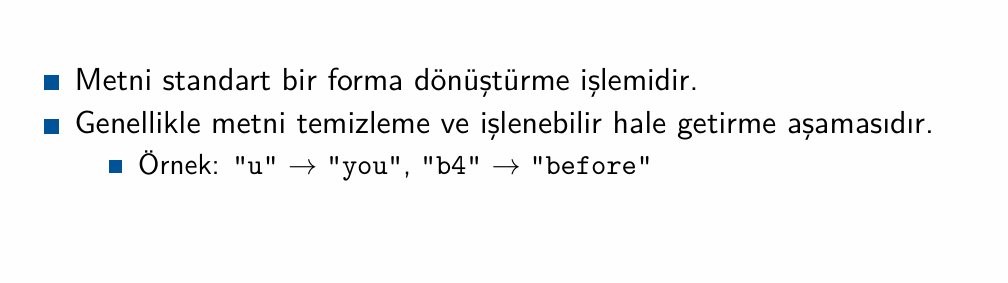

Büyük/Küçük Harf Dönüşümü

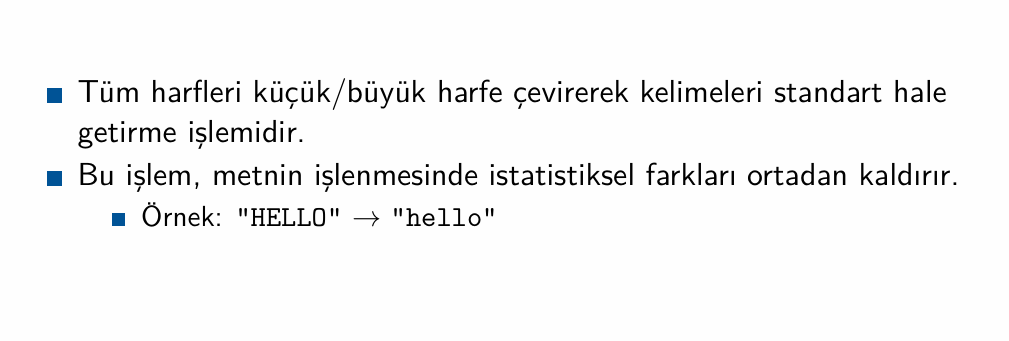

Ayırıcı İşaretleri Yeniden Ekleme

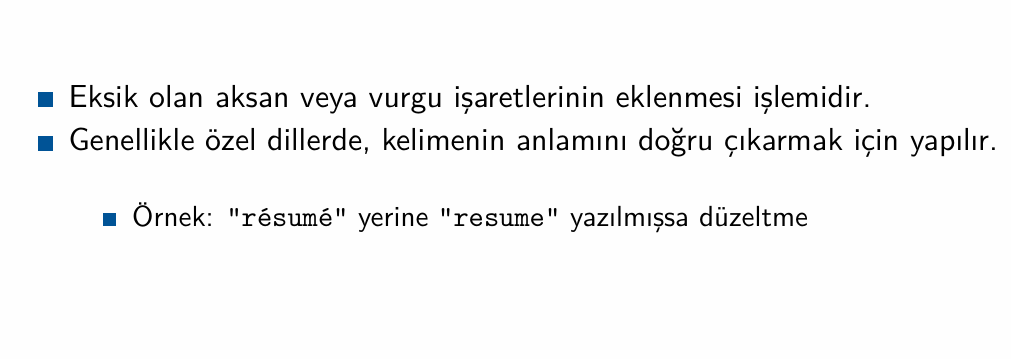

Kısaltmaların Notasyonu

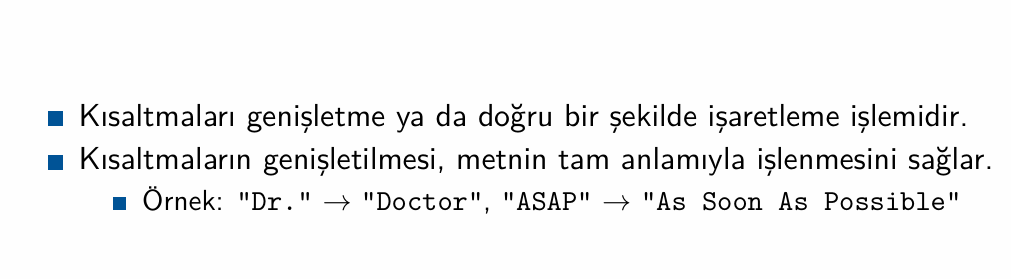

Stopwords’lerin çıkarılamsı

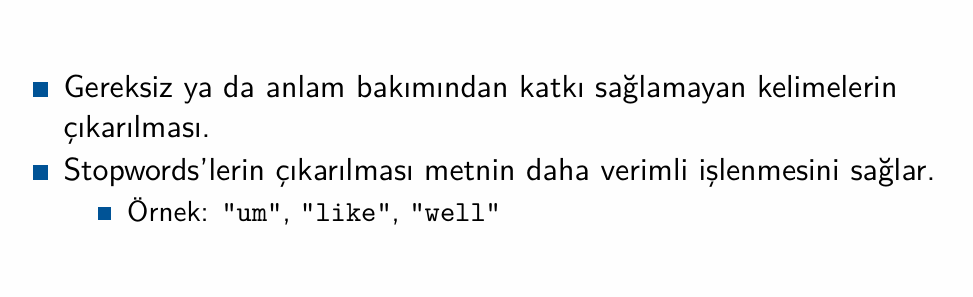

Düzenleme ve Sunum İşaretlemeleri özellikle HTML'de 

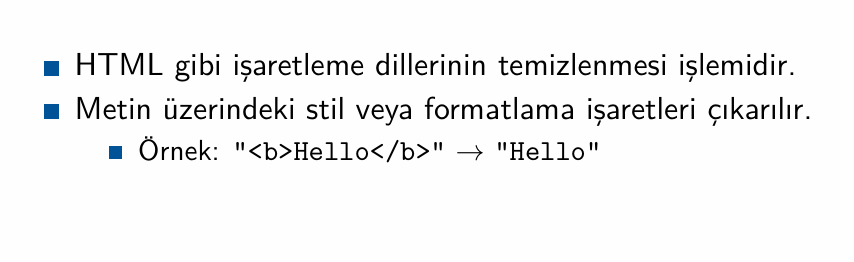

Yazım Hatası Düzeltme

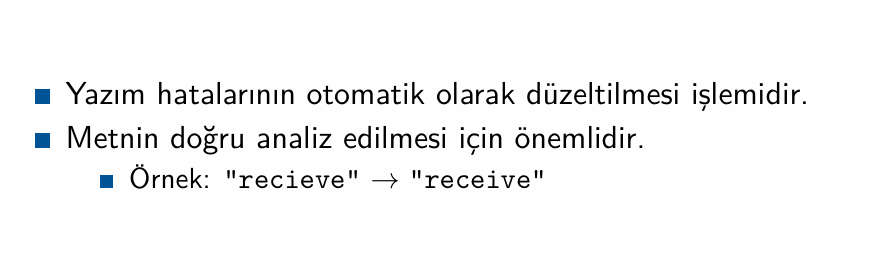

Yazım hatalarının otomatik olarak düzeltilmesi için Python'da birkaç kütüphane kullanılabilir. En yaygın kullanılanlardan biri pyspellchecker 

In [80]:
from spellchecker import SpellChecker

# SpellChecker nesnesi oluşturma
spell = SpellChecker()

# Yazım hatası olan kelime
misspelled_word = "recieve"

# Doğru yazımını bulma

best_correction = spell.candidates(misspelled_word)

# Sonucu yazdırma
print(f"Hatalı kelime: {misspelled_word}")
print(f"Düzeltme önerisi: {best_correction}")


from textblob import TextBlob

# Yazım hatası olan kelime
misspelled_word = "recieve"

# Düzeltme önerisi
corrected_word = TextBlob(misspelled_word).correct()

# Sonucu yazdırma
print(f"Hatalı kelime: {misspelled_word}")
print(f"Düzeltme önerisi: {corrected_word}")

Hatalı kelime: recieve
Düzeltme önerisi: {'receive', 'relieve'}
Hatalı kelime: recieve
Düzeltme önerisi: receive


Alt Kelime Tokenizasyonu

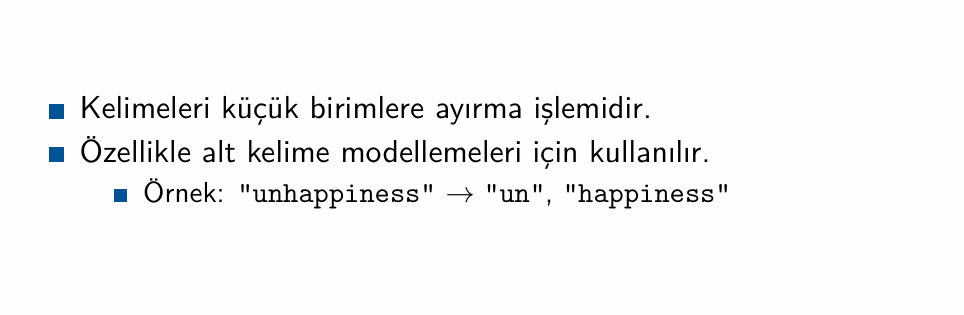

Lemmalaştırma ve Kök Bulma

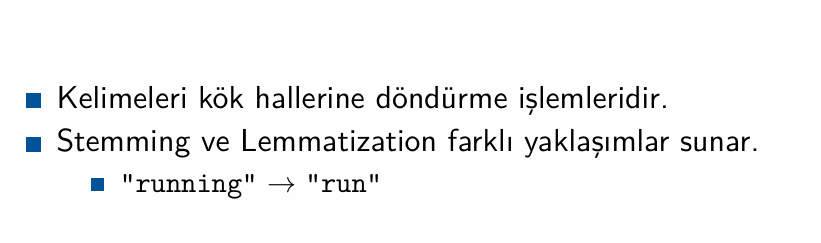

Tokenization Problemleri

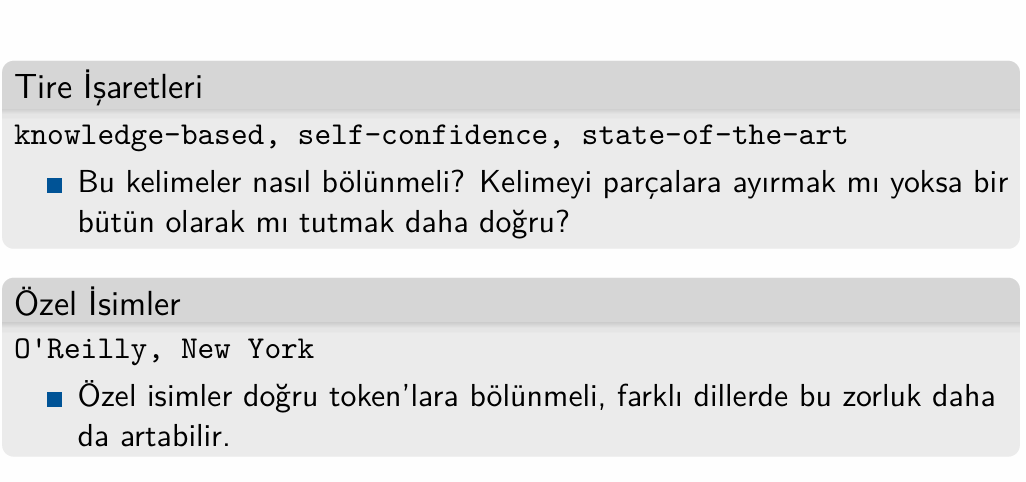

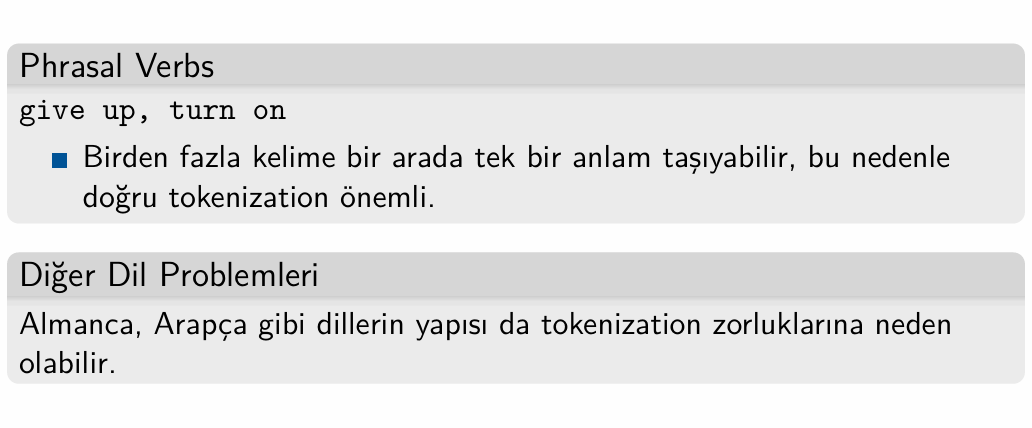

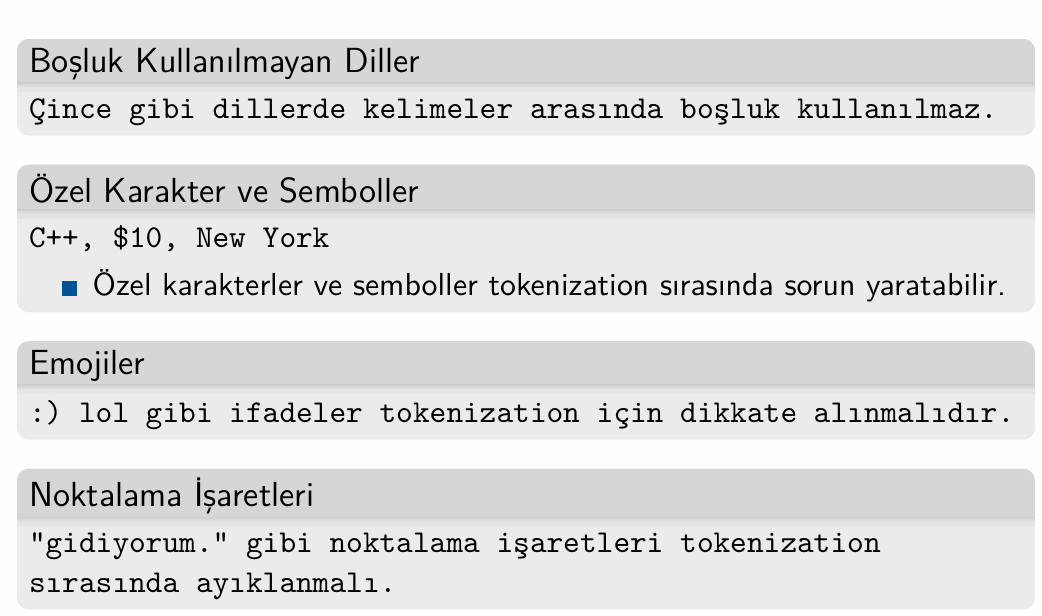

In [81]:
import nltk
import spacy

# NLTK'nin 'punkt' paketini indir
nltk.download('punkt')

# Gerekli bileşenleri içe aktar
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from gensim.utils import simple_tokenize
text = "That U.S.A. don't poster-print costs $12.40..."





[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\murat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [82]:
tokens_nltk = word_tokenize(text)
print(f"{ tokens_nltk}")

['That', 'U.S.A.', 'do', "n't", 'poster-print', 'costs', '$', '12.40', '...']


In [83]:
tokenizer = nltk.tokenize.TreebankWordTokenizer()
tokens = tokenizer.tokenize(text)
print(f"{tokens}")

['That', 'U.S.A.', 'do', "n't", 'poster-print', 'costs', '$', '12.40', '...']


In [84]:
tokens_split = text.split()
print(f"{tokens_split}")

['That', 'U.S.A.', "don't", 'poster-print', 'costs', '$12.40...']


In [85]:
blob = TextBlob(text)
tokens_textblob = blob.words
print(tokens_textblob)

['That', 'U.S.A', 'do', "n't", 'poster-print', 'costs', '12.40']


In [86]:
tokens_gensim = list(simple_tokenize(text))
print("(5)", tokens_gensim)

(5) ['That', 'U', 'S', 'A', 'don', 't', 'poster', 'print', 'costs']


In [87]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
tokens = [token.text for token in doc]
print("(7)",tokens)

pattern = r'[A-Z]\.\S+|\$?\d+\.\d+%?|\w+[-\']?\w+'

tokens = nltk.regexp_tokenize(text, pattern) #tokens = re.findall(pattern, text)
print("tokens=>",tokens)

(7) ['That', 'U.S.A.', 'do', "n't", 'poster', '-', 'print', 'costs', '$', '12.40', '...']
tokens=> ['That', 'U.S.A.', "don't", 'poster-print', 'costs', '$12.40']


Sentence Segmentation

Sentence segmentasyonu, metinleri cümlelere bölme işlemidir ve metni analiz edilebilir hale getirir. Bu süreç, duygu analizi, makine çevirisi gibi bağlam ve anlam odaklı uygulamalar için kritik öneme sahiptir. Kelime indekslerini koruyarak bilgi edinme süreçlerini destekler ve dilbilgisi ile sözdizimi analizine temel oluşturur. Ayrıca metin özetleme gibi işlemler için gerekli bir ön adım olarak işlev görür. Segmentasyon, metin üzerinde daha hassas analizler yapabilmek için temel taşlardan biridir.



In [88]:
import nltk
import spacy
from textblob import TextBlob

In [89]:
text = "This is the first sentence. This is the second sentence and this is the third sentence and ı have a dog? Abbreviations like etc. or Dr. are common."

In [90]:
nltk_sentences = nltk.sent_tokenize(text)
print("NLTK Sentences:")
for sentence in nltk_sentences:
    print(sentence)

NLTK Sentences:
This is the first sentence.
This is the second sentence and this is the third sentence and ı have a dog?
Abbreviations like etc.
or Dr. are common.


In [91]:
doc = nlp(text)
print("\nspaCy Sentences:")
for sentence in doc.sents:
    print(sentence.text)


spaCy Sentences:
This is the first sentence.
This is the second sentence and this is the third sentence and ı have a dog?
Abbreviations like etc. or Dr. are common.


In [92]:
blob = TextBlob(text)
print("\nTextBlob Sentences:")
for sentence in blob.sentences:
    print(sentence)


TextBlob Sentences:
This is the first sentence.
This is the second sentence and this is the third sentence and ı have a dog?
Abbreviations like etc.
or Dr. are common.


In [93]:
import re
sentence_pattern = r'(?<!\w\.\w.)(?<=\.|\?|\!)\s+(?=[A-Z])'
sentences = re.split(sentence_pattern, text)
print("\nRegex Sentences:")
for sentence in sentences:
    print(sentence.strip())


Regex Sentences:
This is the first sentence.
This is the second sentence and this is the third sentence and ı have a dog?
Abbreviations like etc. or Dr. are common.


Etkisiz Kelimeler (Stopwords)

 **Zipf Kanunu**: Çok kullanılan kelimelerin genellikle az bilgi taşıdığı
 gözlemine dayanan bir yasadır. Örneğin, ”a”, ”the” gibi kelimeler çok
 sık geçer, ancak anlam açısından büyük katkı sağlamaz.

 **Hazır Listeler**: Etkisiz kelimeleri çıkarmak için hazır stopwords
 listeleri kullanılır.
 Örnekler: a, an, the (İngilizce)
 Örnekler: bile, hiç, pek (Türkçe)
 
**Problemler**: Bazı cümlelerde etkisiz kelimelerin çıkarılması anlam
 kaybına yol açabilir.
 "To be or not to be": ”to” kelimesi çıkarıldığında anlam bozulur.
 "Flight to Isparta": ”to” çıkarıldığında yön veya bağlam
 kaybolabilir.

In [96]:
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
english_stopwords = set(stopwords.words('english'))





[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\murat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [101]:
def remove_english_stopword(text):
    words=word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in english_stopwords]
    return ' '.join(filtered_words)

In [102]:

english_text = "The sentence is an example of some English in stopwords."
english_text_without_stopwords = remove_english_stopword(english_text)
print(english_text_without_stopwords)

sentence example English stopwords .


In [103]:
#! SPACY STOP WORD
import spacy
nlp_en = spacy.load('en_core_web_sm')


In [104]:
def remove_stopwords(text,language):
    if (language=='english'):
        doc=nlp_en(text)
        notstopwords_text=[token.text for token in doc if not token.is_stop]
    return ' '.join(notstopwords_text)    

In [105]:
english_text = "The sentence is an example of some English stopwords."
english_text_without_stopwords = remove_stopwords(english_text,'english')
print(english_text_without_stopwords)

sentence example English stopwords .


In [107]:
import nltk
from stop_words import get_stop_words
from nltk.tokenize import word_tokenize
turkish_stopwords = get_stop_words('turkish')

def remove_turkish_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in turkish_stopwords]
    return ' '.join(filtered_words)

turkish_text = "Bu, etkisiz kelimeleri içeren birkaç bazı anlamsız yapıda cümledir."
turkish_text_without_stopwords = remove_turkish_stopwords(turkish_text)
print(turkish_text_without_stopwords)

, etkisiz kelimeleri içeren bazı anlamsız yapıda cümledir .
